In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [83]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('training_extra.csv')
df = pd.concat([df1, df2], axis=0, ignore_index=True)



In [84]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [85]:
df['Size'].unique()

array(['Medium', 'Small', 'Large', nan], dtype=object)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


In [87]:
u_val = {col : df[col].unique() for col in df.columns}
for col,val in  u_val.items():
    print(f"{col} : {val}\n")

id : [      0       1       2 ... 4194315 4194316 4194317]

Brand : ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma' nan]

Material : ['Leather' 'Canvas' 'Nylon' nan 'Polyester']

Size : ['Medium' 'Small' 'Large' nan]

Compartments : [ 7. 10.  2.  8.  1.  3.  5.  9.  6.  4.]

Laptop Compartment : ['Yes' 'No' nan]

Waterproof : ['No' 'Yes' nan]

Style : ['Tote' 'Messenger' nan 'Backpack']

Color : ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink' nan]

Weight Capacity (kg) : [11.61172281 27.07853658 16.64375995 ... 12.79080004 22.95972519
 16.64173875]

Price : [112.15875  68.88056  39.1732  ...  72.77859 100.96727 100.97298]



In [88]:
df['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].mean(), inplace=True)


C:\Users\abhay\AppData\Local\Temp\ipykernel_9716\1509965078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].mean(), inplace=True)


In [89]:
df['Weight Capacity (kg)'].unique()

array([11.61172281, 27.07853658, 16.64375995, ..., 12.79080004,
       22.95972519, 16.64173875])

In [90]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

<Axes: >

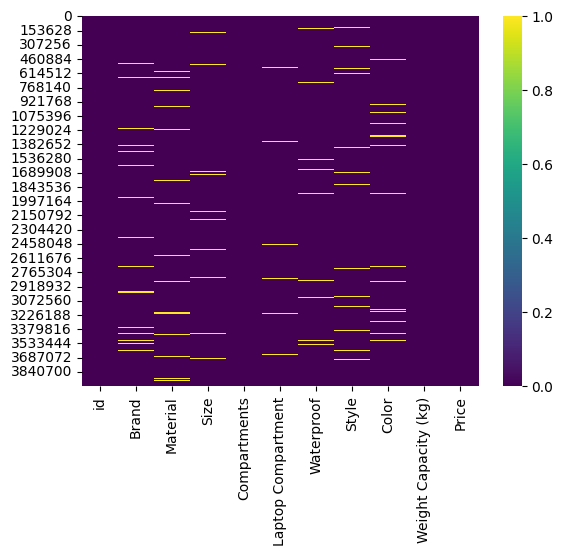

In [91]:
sns.heatmap(df.isnull(), cmap='viridis')

In [92]:
df['Size'].unique()

array(['Medium', 'Small', 'Large', nan], dtype=object)

In [93]:
df['Brand'].fillna(df['Brand'].mode()[0])
df['Material'].fillna(df['Material'].mode()[0])
df['Size'].fillna(df['Size'].mode()[0])
df['Laptop Compartment'].fillna(df['Laptop Compartment'].mode()[0])
df['Waterproof'].fillna(df['Waterproof'].mode()[0])
df['Style'].fillna(df['Style'].mode()[0])
df['Color'].fillna(df['Color'].mode()[0])

0          Black
1          Green
2            Red
3          Green
4          Green
           ...  
3994313     Blue
3994314     Blue
3994315      Red
3994316     Gray
3994317     Blue
Name: Color, Length: 3994318, dtype: object

In [94]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
columns = ['Laptop Compartment', 'Waterproof',]
for col in columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [95]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,1,0,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,1,1,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,1,0,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,1,0,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,1,1,Messenger,Green,17.749338,86.02312


In [96]:
df = pd.get_dummies(df, columns=['Brand','Material', 'Size' , 'Style','Color'], drop_first=True)


In [97]:
df

,id,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Size_Medium,Size_Small,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0,7.0,1,0,11.611723,112.15875,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False
1,1,10.0,1,1,27.078537,68.88056,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
2,2,2.0,1,0,16.643760,39.17320,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,True
3,3,8.0,1,0,12.937220,80.60793,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False
4,4,1.0,1,1,17.749338,86.02312,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994313,4194313,3.0,1,1,28.098120,104.74460,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3994314,4194314,10.0,1,1,17.379531,122.39043,False,False,True,False,True,False,False,False,True,False,True,True,False,False,False,False
3994315,4194315,10.0,0,0,17.037708,148.18470,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3994316,4194316,2.0,0,0,28.783339,22.32269,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False


In [98]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Compartments', 'Weight Capacity (kg)']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())


   id  Compartments  Laptop Compartment  ...  Color_Green  Color_Pink  Color_Red
0   0      0.541043                   1  ...        False       False      False
1   1      1.578013                   1  ...         True       False      False
2   2     -1.187242                   1  ...        False       False       True
3   3      0.886700                   1  ...         True       False      False
4   4     -1.532898                   1  ...         True       False      False

[5 rows x 22 columns]


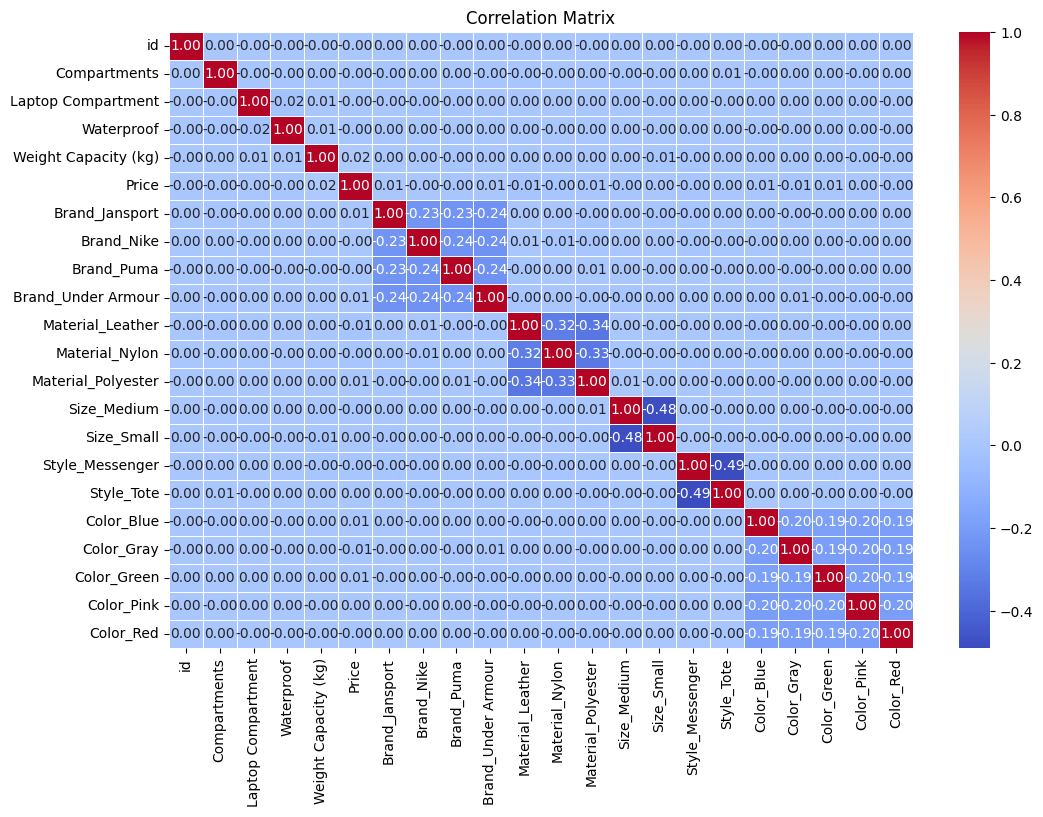

In [99]:

corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [100]:
price = df["Price"]
price

0          112.15875
1           68.88056
2           39.17320
3           80.60793
4           86.02312
             ...    
3994313    104.74460
3994314    122.39043
3994315    148.18470
3994316     22.32269
3994317    107.61199
Name: Price, Length: 3994318, dtype: float64

In [ ]:
X = df.drop(['Price','id','Material_Leather','Material_Nylon','Material_Polyester','Color_Blue','Color_Gray','Color_Green','Color_Pink','Color_Red','Brand_Nike','Brand_Puma','Brand_Jansport','Brand_Under Armour',], axis=1)
X


,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Size_Medium,Size_Small,Style_Messenger,Style_Tote
0,0.541043,1,0,-0.917719,True,False,False,True
1,1.578013,1,1,1.300576,False,True,True,False
2,-1.187242,1,0,-0.196010,False,True,True,False
3,0.886700,1,0,-0.727612,False,True,True,False
4,-1.532898,1,1,-0.037445,True,False,True,False
...,...,...,...,...,...,...,...,...
3994313,-0.841585,1,1,1.446807,False,False,True,False
3994314,1.578013,1,1,-0.090483,False,True,False,True
3994315,1.578013,0,0,-0.139509,False,False,False,False
3994316,-1.187242,0,0,1.545083,False,False,False,False


In [ ]:

sns.boxplot(X)

In [102]:
X

,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Size_Medium,Size_Small,Style_Messenger,Style_Tote
0,0.541043,1,0,-0.917719,True,False,False,True
1,1.578013,1,1,1.300576,False,True,True,False
2,-1.187242,1,0,-0.196010,False,True,True,False
3,0.886700,1,0,-0.727612,False,True,True,False
4,-1.532898,1,1,-0.037445,True,False,True,False
...,...,...,...,...,...,...,...,...
3994313,-0.841585,1,1,1.446807,False,False,True,False
3994314,1.578013,1,1,-0.090483,False,True,False,True
3994315,1.578013,0,0,-0.139509,False,False,False,False
3994316,-1.187242,0,0,1.545083,False,False,False,False


In [103]:
price

0          112.15875
1           68.88056
2           39.17320
3           80.60793
4           86.02312
             ...    
3994313    104.74460
3994314    122.39043
3994315    148.18470
3994316     22.32269
3994317    107.61199
Name: Price, Length: 3994318, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,price, test_size=0.2, random_state=69)

In [105]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [106]:
X_test

,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Size_Medium,Size_Small,Style_Messenger,Style_Tote
3001842,0.541043,0,1,-0.014024,True,False,False,False
2757444,0.541043,0,1,0.411433,True,False,True,False
876093,-0.495928,1,1,-1.865991,True,False,False,True
3749653,1.232357,1,0,0.000069,False,False,False,False
2824698,-0.150271,0,1,1.522290,False,True,True,False
...,...,...,...,...,...,...,...,...
2984136,-1.532898,1,1,-1.362776,True,False,False,True
975135,0.541043,1,0,0.458326,False,True,False,True
1616209,-1.532898,0,0,0.990735,True,False,False,False
3744399,0.195386,0,0,-1.592292,True,False,True,False


In [107]:
y_pred = regressor.predict(X_test)


In [108]:
y_pred

array([81.09356972, 81.16634031, 79.92228658, ..., 82.13884005,
       80.15523934, 82.89080211])

In [109]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 38.92212643772857


In [110]:
test_data = pd.read_csv("test.csv")

In [111]:
test_data.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    200000 non-null  int64  
 1   Brand                 193773 non-null  object 
 2   Material              194387 non-null  object 
 3   Size                  195619 non-null  object 
 4   Compartments          200000 non-null  float64
 5   Laptop Compartment    195038 non-null  object 
 6   Waterproof            195189 non-null  object 
 7   Style                 194847 non-null  object 
 8   Color                 193215 non-null  object 
 9   Weight Capacity (kg)  199923 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 15.3+ MB


In [112]:
test_data['Weight Capacity (kg)'].fillna(test_data['Weight Capacity (kg)'].mean(), inplace=True)
test_data['Brand'].fillna(test_data['Brand'].mode()[0])
test_data['Material'].fillna(test_data['Material'].mode()[0])
test_data['Size'].fillna(test_data['Size'].mode()[0])
test_data['Laptop Compartment'].fillna(test_data['Laptop Compartment'].mode()[0])
test_data['Waterproof'].fillna(test_data['Waterproof'].mode()[0])
test_data['Style'].fillna(test_data['Style'].mode()[0])
test_data['Color'].fillna(test_data['Color'].mode()[0])
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
columns = ['Laptop Compartment', 'Waterproof',]
for col in columns:
    label_encoders[col] = LabelEncoder()
    test_data[col] = label_encoders[col].fit_transform(test_data[col])
test_data = pd.get_dummies(test_data, columns=['Brand','Material', 'Size' , 'Style','Color'], drop_first=True)
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Compartments', 'Weight Capacity (kg)']
scaler = StandardScaler()
test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])


C:\Users\abhay\AppData\Local\Temp\ipykernel_9716\291172897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Weight Capacity (kg)'].fillna(test_data['Weight Capacity (kg)'].mean(), inplace=True)


In [113]:
X_test = test_data.drop(['id','Material_Leather','Material_Nylon','Material_Polyester','Color_Blue','Color_Gray','Color_Green','Color_Pink','Color_Red','Brand_Nike','Brand_Puma','Brand_Jansport','Brand_Under Armour',], axis=1)

In [114]:
X_test.head()

,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Size_Medium,Size_Small,Style_Messenger,Style_Tote
0,-1.191822,0,0,0.384195,False,True,False,True
1,0.539041,0,1,-0.635362,True,False,False,False
2,1.231386,0,1,-0.887030,False,False,True,False
3,-1.537995,1,0,0.069434,False,False,True,False
4,-1.191822,1,1,-1.159863,False,False,False,True


In [115]:
y_pred = regressor.predict(X_test)
y_pred

array([82.15870033, 80.67695413, 80.46708225, ..., 82.37761521,
       82.38677225, 81.87355868])

In [116]:
id = test_data['id']

In [117]:
result = pd.DataFrame({'id' :id, 'Price': y_pred})
result.to_csv('prediction_results.csv', index=False)
result

,id,Price
0,300000,82.158700
1,300001,80.676954
2,300002,80.467082
3,300003,81.410785
4,300004,80.598499
...,...,...
199995,499995,80.335785
199996,499996,80.028943
199997,499997,82.377615
199998,499998,82.386772
